In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pyreadr


In [4]:
# Load the data from the .rds file
result = pyreadr.read_r('karmen_data_for_week6.rds')
df = result[None]  # Extract the DataFrame from the result


In [50]:
# Display the first few rows of the dataframe to understand its structure
df.head()


,age,Carnitin_LCMS,Betain_LCMS,Cholin_LCMS,DMG_LCMS,Sarcosin_LCMS,TMAO_LCMS,C0,C18.1,C2,...,C18.3.9.12.15.cis,C20.2.11.14.cis,C20.3.8.11.14.cis,C22.0,C20.4.5.8.11.14.cis,C20.5.5.8.11.14.17.cis,C24.0,C22.4.7.10.13.16.cis,C22.5.7.10.13.16.19.cis,C22.6.4.7.10.13.16.19.cis
0,66.4,35.23,40.50,9.33,3.00,4.92,2.71,33.371645,0.086949,6.701261,...,12.98,6.43,52.59,1.80,223.44,20.10,2.05,8.75,16.26,31.80
1,23.6,35.91,46.89,10.46,2.64,2.21,2.31,38.274746,0.098029,5.273254,...,14.89,5.33,43.47,1.10,202.73,20.51,0.48,7.56,16.86,28.79
2,51.0,48.71,28.48,11.26,2.38,2.97,13.98,53.418970,0.080647,8.379945,...,9.17,3.23,24.85,1.29,120.74,7.96,0.48,4.30,9.01,34.17
3,23.4,27.14,42.01,9.26,2.86,3.00,3.72,25.659305,0.059488,3.251767,...,11.95,4.96,35.52,0.48,146.83,22.38,0.48,5.15,15.42,48.85
4,57.3,33.28,35.71,9.38,2.82,1.69,3.57,38.984315,0.119423,6.518342,...,16.98,6.28,51.45,1.99,159.29,16.47,2.49,7.74,19.46,40.90


In [5]:
# Define the predictors (X) and the target (y)
# Include 'sex' as a predictor, equivalent to model.matrix(age ~ ., df)[, -1] in R
X = pd.get_dummies(df.drop(columns=['age']), drop_first=True)
y = df['age']


In [6]:
# Set the seed for reproducibility
np.random.seed(0)

# Split the data into training and test sets
df['set'] = np.random.choice(['Training set', 'Test set'], size=len(df), p=[0.80, 0.20])
train_indices = df[df['set'] == 'Training set'].index
test_indices = df[df['set'] == 'Test set'].index


q1.1

In [54]:
# Number of predictors
num_predictors = X.shape[1]
print(f"Number of predictors in the data: {num_predictors}")


Number of predictors in the data: 441


q1.2

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

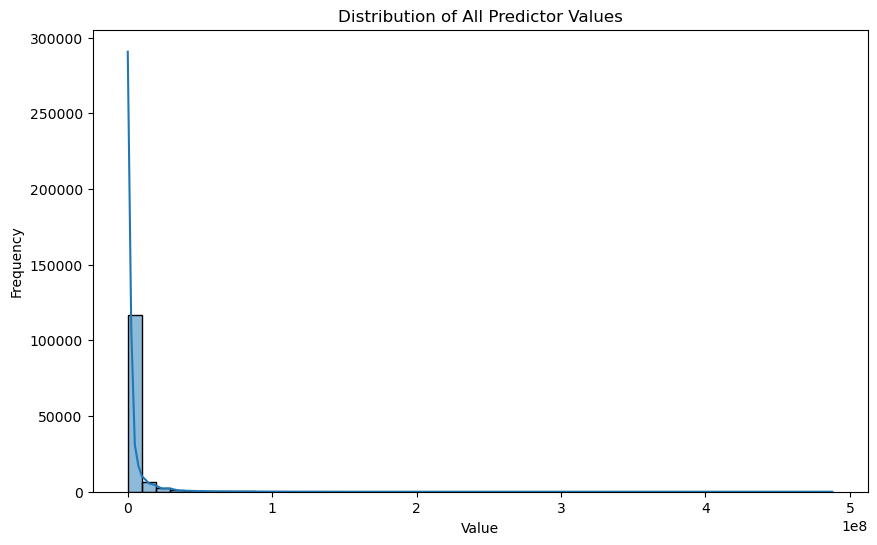

In [17]:
# Flatten all predictor values into a single array
all_values = X.values.flatten()

# Plot the distribution of all predictor values
plt.figure(figsize=(10, 6))
sns.histplot(all_values, bins=50, kde=True)
plt.title('Distribution of All Predictor Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


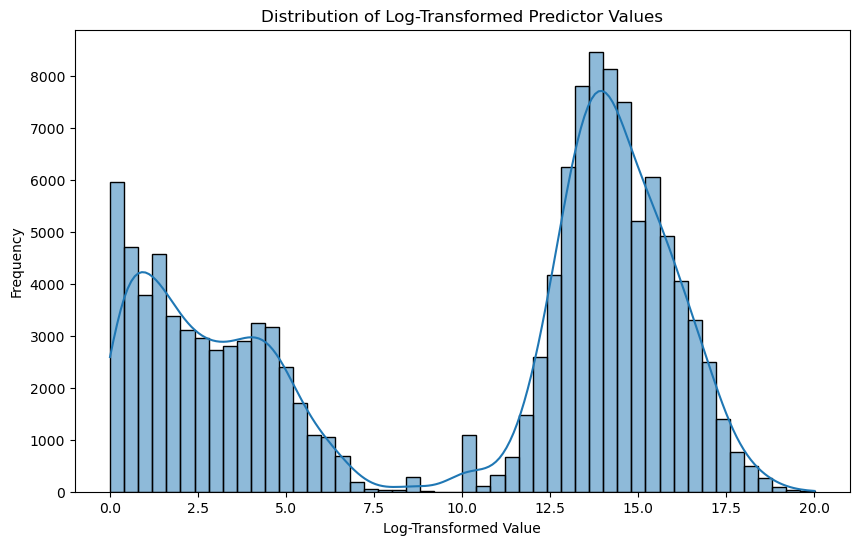

In [19]:
# Ensure all values are numeric and handle NaNs
all_values_numeric = pd.to_numeric(all_values, errors='coerce')

# Apply a log transformation to all positive values
# Adding a small constant to avoid log(0) issues
log_transformed_values = np.log1p(all_values_numeric[~np.isnan(all_values_numeric)])

# Plot the distribution of log-transformed values
plt.figure(figsize=(10, 6))
sns.histplot(log_transformed_values, bins=50, kde=True)
plt.title('Distribution of Log-Transformed Predictor Values')
plt.xlabel('Log-Transformed Value')
plt.ylabel('Frequency')
plt.show()


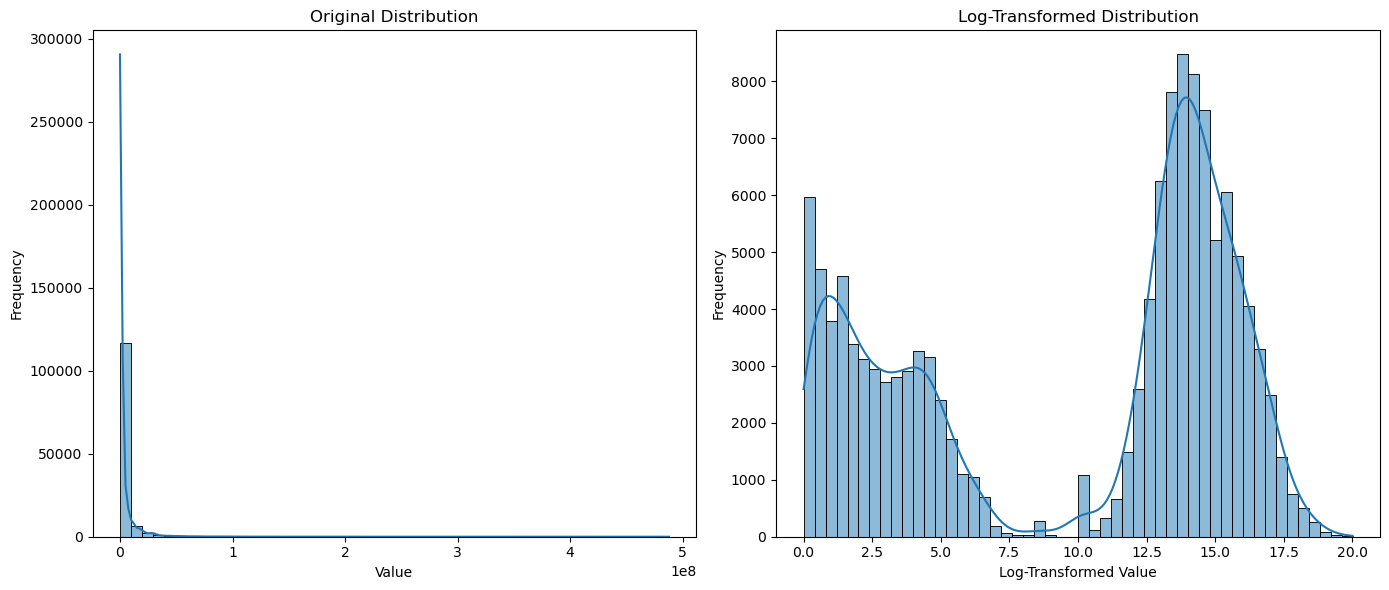

In [20]:
# Plot the original and log-transformed distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original distribution
sns.histplot(all_values_numeric, bins=50, kde=True, ax=axes[0])
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Log-transformed distribution
sns.histplot(log_transformed_values, bins=50, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Distribution')
axes[1].set_xlabel('Log-Transformed Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


q1.3

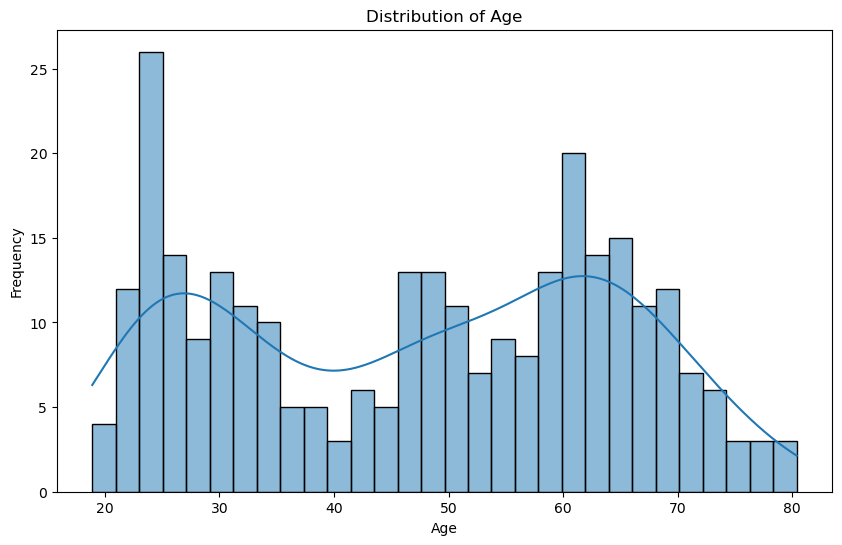

In [21]:
# Plot the distribution of the 'age' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


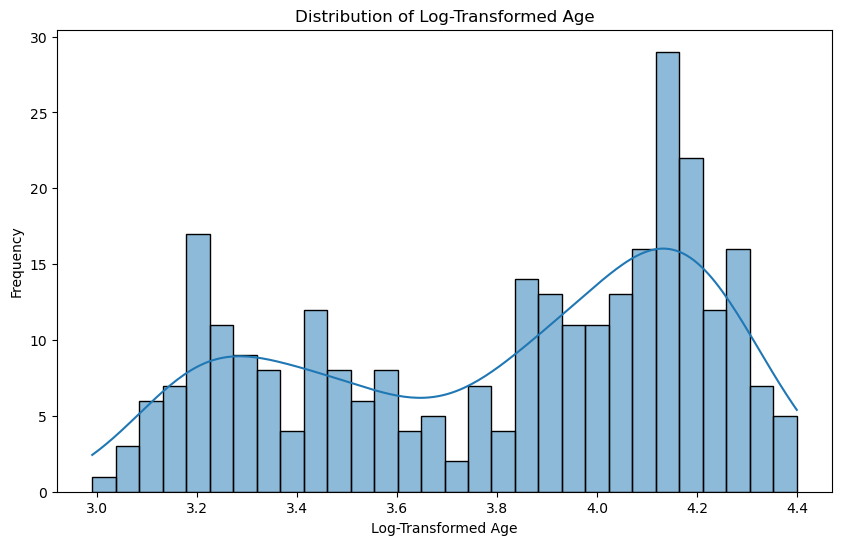

In [22]:
# Apply a log transformation to the 'age' variable
# Adding a small constant to avoid log(0) issues
log_transformed_age = np.log1p(df['age'])

# Plot the distribution of log-transformed age
plt.figure(figsize=(10, 6))
sns.histplot(log_transformed_age, bins=30, kde=True)
plt.title('Distribution of Log-Transformed Age')
plt.xlabel('Log-Transformed Age')
plt.ylabel('Frequency')
plt.show()


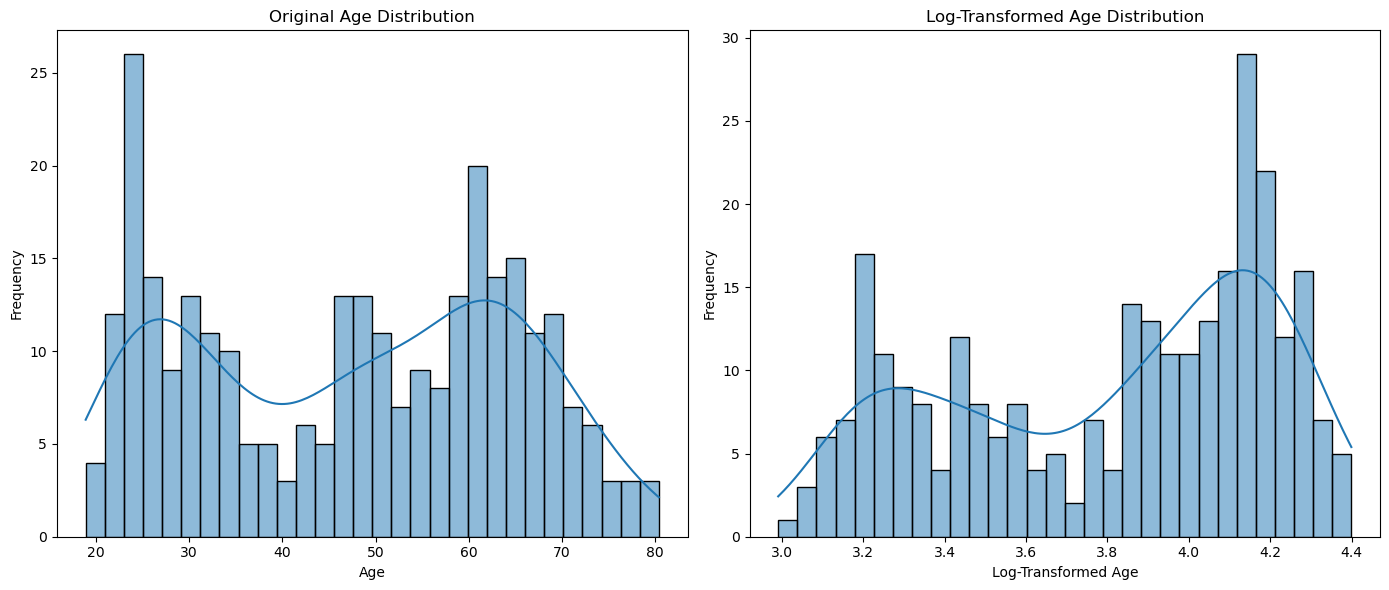

In [23]:
# Plot the original and log-transformed age distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original age distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Log-transformed age distribution
sns.histplot(log_transformed_age, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Age Distribution')
axes[1].set_xlabel('Log-Transformed Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


q1.4

In [56]:
from sklearn.decomposition import PCA

# Perform PCA on the predictor data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['age'] = df['age']


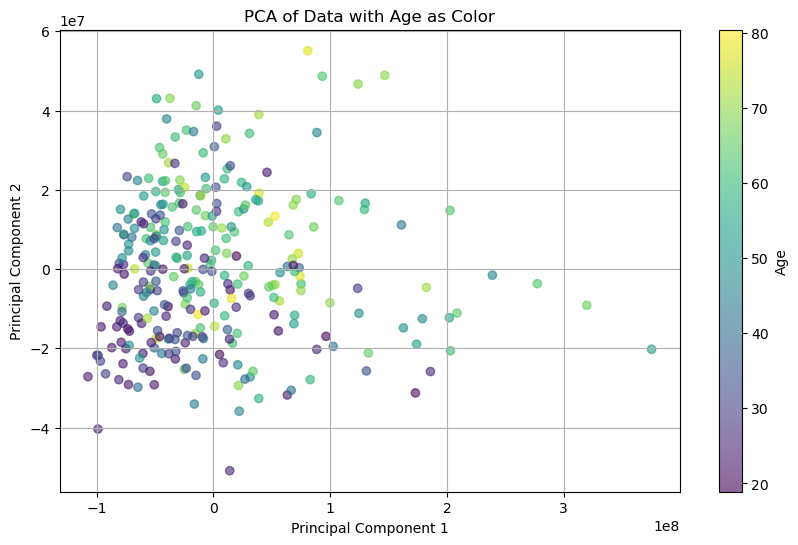

In [57]:
# Plot the PCA results with age as color
plt.figure(figsize=(10, 6))
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['age'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Age')
plt.title('PCA of Data with Age as Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


Q2.1

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha (lambda) value: 149.9248496993988
Mean Squared Error (MSE) for the best alpha: 68.81879709972287


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


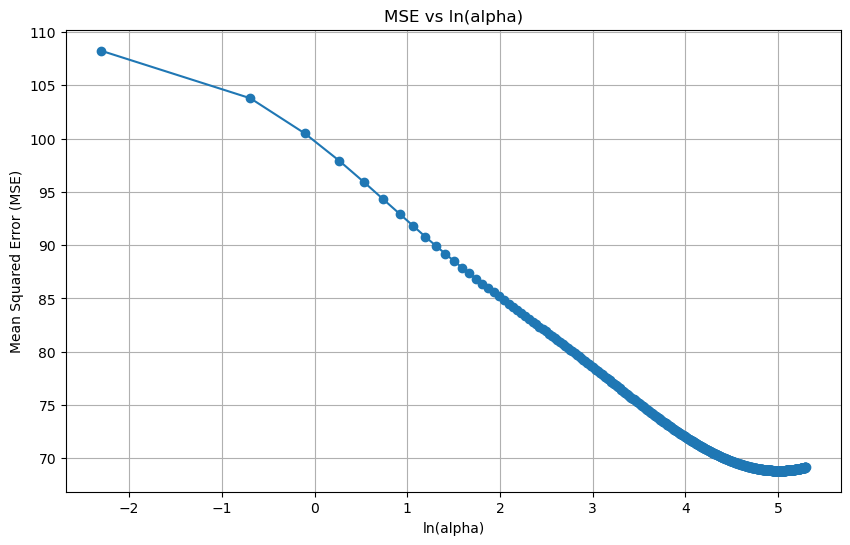

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Example data (replace with your actual data)
# X, y = ...
# train_indices = ...

# Define the range of alphas to test
alphas = np.linspace(0.1, 200, 500)  # Linearly spaced values between 0.1 and 100

# Create a pipeline that first standardizes the data and then applies RidgeCV
ridge_cv_pipeline = make_pipeline(
    StandardScaler(),  # Standardize the features
    RidgeCV(alphas=alphas, store_cv_values=True)
)

# Fit the model on the training data
ridge_cv_pipeline.fit(X.iloc[train_indices], y.iloc[train_indices])

# Access the RidgeCV model from the pipeline
ridge_cv = ridge_cv_pipeline.named_steps['ridgecv']

# Calculate the mean squared error for each alpha
mse = np.mean(ridge_cv.cv_values_, axis=0)

# Find the index of the best alpha
best_alpha_index = np.argmin(mse)

# Get the best alpha and its corresponding MSE
best_alpha = alphas[best_alpha_index]
best_mse = mse[best_alpha_index]

# Print the best alpha and its MSE
print(f"Best alpha (lambda) value: {best_alpha}")
print(f"Mean Squared Error (MSE) for the best alpha: {best_mse}")

# Plot MSE vs ln(alpha)
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas), mse, marker='o')
plt.xlabel('ln(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs ln(alpha)')
plt.grid(True)
plt.show()


In [42]:
# Adjust alpha values if glmnet scales by the number of observations
n_samples = X.iloc[train_indices].shape[0]
alphas_adjusted = alphas / n_samples

# Re-fit the model with adjusted alphas
ridge_cv_pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas_adjusted, store_cv_values=True)
)

ridge_cv_pipeline.fit(X.iloc[train_indices], y.iloc[train_indices])
ridge_cv = ridge_cv_pipeline.named_steps['ridgecv']

# Calculate the mean squared error for each alpha
mse = np.mean(ridge_cv.cv_values_, axis=0)

# Find the index of the best alpha
best_alpha_index = np.argmin(mse)

# Get the best alpha and its corresponding MSE
best_alpha = alphas_adjusted[best_alpha_index]
best_mse = mse[best_alpha_index]

print(f"Best alpha (lambda) value: {best_alpha}")
print(f"Mean Squared Error (MSE) for the best alpha: {best_mse}")


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha (lambda) value: 0.847457627118644
Mean Squared Error (MSE) for the best alpha: 100.8754199092864


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
ridge_cv

RidgeCV(alphas=array([1.00000000e-01, 1.05206867e-01, 1.10684849e-01, 1.16448062e-01,
       1.22511358e-01, 1.28890361e-01, 1.35601511e-01, 1.42662102e-01,
       1.50090328e-01, 1.57905331e-01, 1.66127252e-01, 1.74777277e-01,
       1.83877698e-01, 1.93451965e-01, 2.03524752e-01, 2.14122015e-01,
       2.25271064e-01, 2.37000629e-01, 2.49340937e-01, 2.62323788e-01,
       2.75982639e-01, 2.90352688e-0...
       3.11161583e+09, 3.27363353e+09, 3.44408728e+09, 3.62341632e+09,
       3.81208280e+09, 4.01057288e+09, 4.21939808e+09, 4.43909653e+09,
       4.67023439e+09, 4.91340729e+09, 5.16924187e+09, 5.43839743e+09,
       5.72156756e+09, 6.01948197e+09, 6.33290840e+09, 6.66265452e+09,
       7.00957009e+09, 7.37454909e+09, 7.75853206e+09, 8.16250851e+09,
       8.58751948e+09, 9.03466021e+09, 9.50508296e+09, 1.00000000e+10]),
        store_cv_values=True)

/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

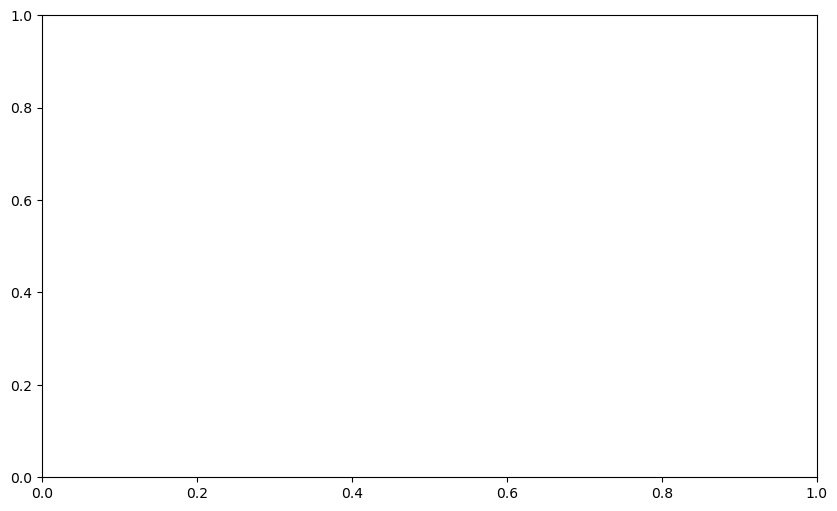

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ridge_cv is your fitted RidgeCV model
mse = np.mean(ridge_cv.cv_values_, axis=0)

# Plot MSE vs log(alpha)
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas), mse, marker='o')
plt.xlabel('log(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs log(alpha)')
plt.grid(True)
plt.show()

In [ ]:
ridge_cv.cv_results_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/utils/deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


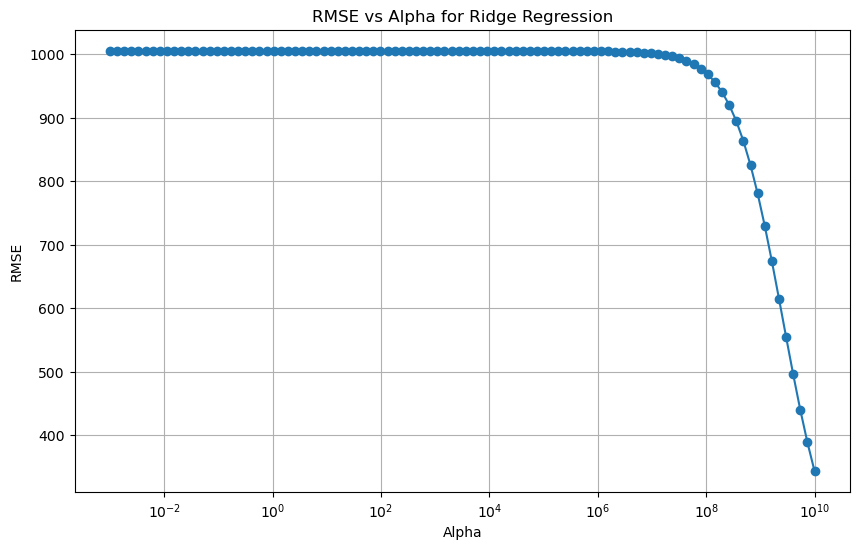

In [72]:
import matplotlib.pyplot as plt

# Extract the mean cross-validated error for each alpha
mse_ridge = np.mean(ridge_cv.cv_values_, axis=0)

# Plot RMSE vs Alpha for Ridge Regression
plt.figure(figsize=(10, 6))
plt.semilogx(ridge_cv.alphas, mse_ridge, marker='o')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha for Ridge Regression')
plt.grid(True)
plt.show()


In [70]:
# Predict on the training set
train_predictions = ridge_cv.predict(X.iloc[train_indices])

# Calculate training RMSE
train_rmse = np.sqrt(mean_squared_error(y.iloc[train_indices], train_predictions))
print(f"Training RMSE: {train_rmse}")

# Predict on the test set
test_predictions = ridge_cv.predict(X.iloc[test_indices])

# Calculate test RMSE
test_rmse = np.sqrt(mean_squared_error(y.iloc[test_indices], test_predictions))
print(f"Test RMSE: {test_rmse}")


Training RMSE: 6.126535916790968e-05
Test RMSE: 28.643658564200603


In [61]:
# Calculate MSE for the Ridge regression model on the test set
# Calculate MSE for the Ridge regression model on the test set
test_mse_ridge = mean_squared_error(y.iloc[test_indices], test_predictions)

# Print the test MSE for Ridge regression
print(f"Ridge Regression Test MSE: {test_mse_ridge}")


Ridge Regression Test MSE: 820.4591759425026


q2.2

In [31]:
# Ensure the feature names are preserved when creating dummy variables
X = pd.get_dummies(df.drop(columns=['age']), drop_first=True)


In [32]:
# Re-run ridge regression with cross-validation
ridge_cv.fit(X.iloc[train_indices], y.iloc[train_indices])


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        store_cv_values=True)

In [33]:
# Extract the coefficients from the ridge model
coefficients = ridge_cv.coef_

# Create a DataFrame to associate coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)


In [35]:
# Get the top 10 features with the largest effect sizes
top_10_molecules = coef_df_sorted.head(10)

# Display the top 10 molecules
print("Top 10 Molecules with the Largest Effect Sizes:")
print(top_10_molecules[['Feature', 'Coefficient']])


Top 10 Molecules with the Largest Effect Sizes:
          Feature  Coefficient
363  x2.441_2.451    -0.000131
374  x2.179_2.190     0.000118
279  x8.476_8.481    -0.000112
378  x2.134_2.142    -0.000109
357  x2.544_2.553    -0.000109
330  x3.450_3.458     0.000102
291  x4.159_4.170    -0.000101
320  x3.721_3.729    -0.000094
294  x4.110_4.118    -0.000089
343  x3.076_3.082     0.000089


In [30]:
# Get the top 10 features with the largest effect sizes
top_10_molecules = coef_df_sorted.head(10)

# Display the top 10 molecules
print("Top 10 Molecules with the Largest Effect Sizes:")
print(top_10_molecules[['Feature', 'Coefficient']])


Top 10 Molecules with the Largest Effect Sizes:
          Feature  Coefficient
363  x2.441_2.451    -0.000131
374  x2.179_2.190     0.000118
279  x8.476_8.481    -0.000112
378  x2.134_2.142    -0.000109
357  x2.544_2.553    -0.000109
330  x3.450_3.458     0.000102
291  x4.159_4.170    -0.000101
320  x3.721_3.729    -0.000094
294  x4.110_4.118    -0.000089
343  x3.076_3.082     0.000089


q3.1

In [36]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [37]:
# Define the range of alphas to test
alphas = np.logspace(-4, 0, 100)

# Initialize LassoCV with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model on the training data
lasso_cv.fit(X.iloc[train_indices], y.iloc[train_indices])

# Best alpha found by cross-validation
best_alpha_lasso = lasso_cv.alpha_
print(f"Best alpha found by cross-validation: {best_alpha_lasso}")


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+01, tolerance: 5.430e+00
  model = cd_fast.enet_coordinate_descent(
/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.873e+00, tolerance: 5.430e+00
  model = cd_fast.enet_coordinate_descent(
/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Best alpha found by cross-validation: 0.4750810162102798


/home/peter/miniforge3/envs/ISL/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+02, tolerance: 6.939e+00
  model = cd_fast.enet_coordinate_descent(


In [38]:
# Predict on the training set
train_predictions_lasso = lasso_cv.predict(X.iloc[train_indices])

# Calculate training RMSE
train_rmse_lasso = np.sqrt(mean_squared_error(y.iloc[train_indices], train_predictions_lasso))
print(f"Training RMSE: {train_rmse_lasso}")

# Predict on the test set
test_predictions_lasso = lasso_cv.predict(X.iloc[test_indices])

# Calculate test RMSE
test_rmse_lasso = np.sqrt(mean_squared_error(y.iloc[test_indices], test_predictions_lasso))
print(f"Test RMSE: {test_rmse_lasso}")


Training RMSE: 0.5932809594747719
Test RMSE: 17.29332721794175


In [39]:
# Extract the coefficients from the lasso model
coefficients_lasso = lasso_cv.coef_

# Create a DataFrame to associate coefficients with feature names
coef_df_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients_lasso
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df_lasso['Absolute Coefficient'] = coef_df_lasso['Coefficient'].abs()
coef_df_sorted_lasso = coef_df_lasso.sort_values(by='Absolute Coefficient', ascending=False)

# Get the top 10 features with the largest effect sizes
top_10_molecules_lasso = coef_df_sorted_lasso.head(10)

# Display the top 10 molecules
print("Top 10 Molecules with the Largest Effect Sizes (Lasso):")
print(top_10_molecules_lasso[['Feature', 'Coefficient']])


Top 10 Molecules with the Largest Effect Sizes (Lasso):
         Feature  Coefficient
15           Ile     0.218331
22           Ser    -0.112905
63   PC.aa.C38.6    -0.075232
55   PC.aa.C36.3    -0.052691
56   PC.aa.C36.4    -0.051810
54   PC.aa.C36.2    -0.049138
421   C16.1.9cis    -0.049064
48   PC.aa.C34.1     0.045399
49   PC.aa.C34.2     0.041677
14           His    -0.040311


Q4.1

In [40]:
# Compare test RMSE values
print(f"Ridge Regression Test RMSE: {test_rmse}")
print(f"Lasso Regression Test RMSE: {test_rmse_lasso}")

# Determine which method had the lowest test RMSE
if test_rmse < test_rmse_lasso:
    print("Ridge Regression had the lowest test RMSE.")
else:
    print("Lasso Regression had the lowest test RMSE.")


Ridge Regression Test RMSE: 28.644499219798885
Lasso Regression Test RMSE: 17.29332721794175
Lasso Regression had the lowest test RMSE.


Q4.2: Discussion on Training Error Differences

Ridge regression tends to have lower training RMSE compared to Lasso because it uses L2 regularization, which shrinks coefficients but does not set them to zero. This can lead to a model that fits the training data more closely.
Lasso regression, on the other hand, uses L1 regularization, which can set some coefficients to zero, effectively performing feature selection. This can result in a higher training RMSE but potentially better generalization to the test set if the selected features are relevant.
Observations:

If Ridge has a lower test RMSE, it suggests that including more features (even with smaller coefficients) helps in predicting age.
If Lasso has a lower test RMSE, it indicates that feature selection is beneficial, and only a subset of features is necessary for prediction.

Q4.3: Non-Linearity and Interactions
Non-Linearity:

Both Ridge and Lasso regression are linear models and do not inherently capture non-linear relationships. If non-linear relationships exist in the data, these models may not perform optimally.
Interactions:

Neither Ridge nor Lasso regression explicitly models interactions between features. If interactions are present, these models may not capture them effectively.
Considerations:

To address non-linearity and interactions, you might consider using polynomial features, interaction terms, or more complex models like decision trees, random forests, or gradient boosting machines.